In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE

## Seeds Dataset

In [5]:
# Load seeds from https://archive.ics.uci.edu/ml/datasets/seeds
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'coefficient', 'groove length', 'varieties']
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    header=None, delim_whitespace=True, names=columns)
seeds.head()

,area,perimeter,compactness,length,width,coefficient,groove length,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# DataFrame to NumPy Array
samples = seeds.iloc[:, :-1].values
varieties = seeds.iloc[:, -1].values
samples.shape, varieties.shape

((210, 7), (210,))

## Hierarchical clustering

In [6]:
# Calculate the linkage
mergings = linkage(samples, method='complete')

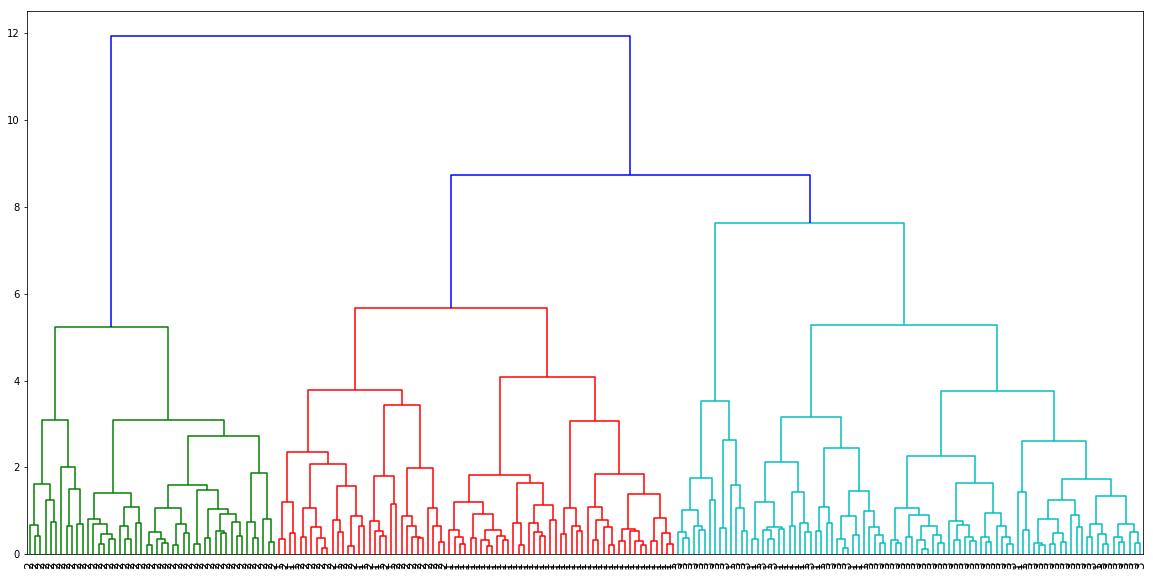

In [9]:
# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20,10))
dendrogram(mergings,
           labels=varieties,
           leaf_font_size=12,
)
plt.show()

## Extracting the cluster labels

In [15]:
# Use fcluster to extract labels
labels = fcluster(mergings, 8, criterion='distance')

In [16]:
# Create a DataFrame with labels and varieties as columns
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [17]:
# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])

In [18]:
# Display ct
print(ct)

varieties   1   2   3
labels               
1           0  47   0
2          52  23   0
3          18   0  70


## t-SNE visualization

In [28]:
# t-SNE: t-distributed stochastic neighbor embedding
# Create a TSNE instance
model = TSNE(learning_rate=200)

In [29]:
# Apply fit_transform to samples
tsne_features = model.fit_transform(samples)

In [30]:
# Select features
xs = tsne_features[:,0]
ys = tsne_features[:,1]

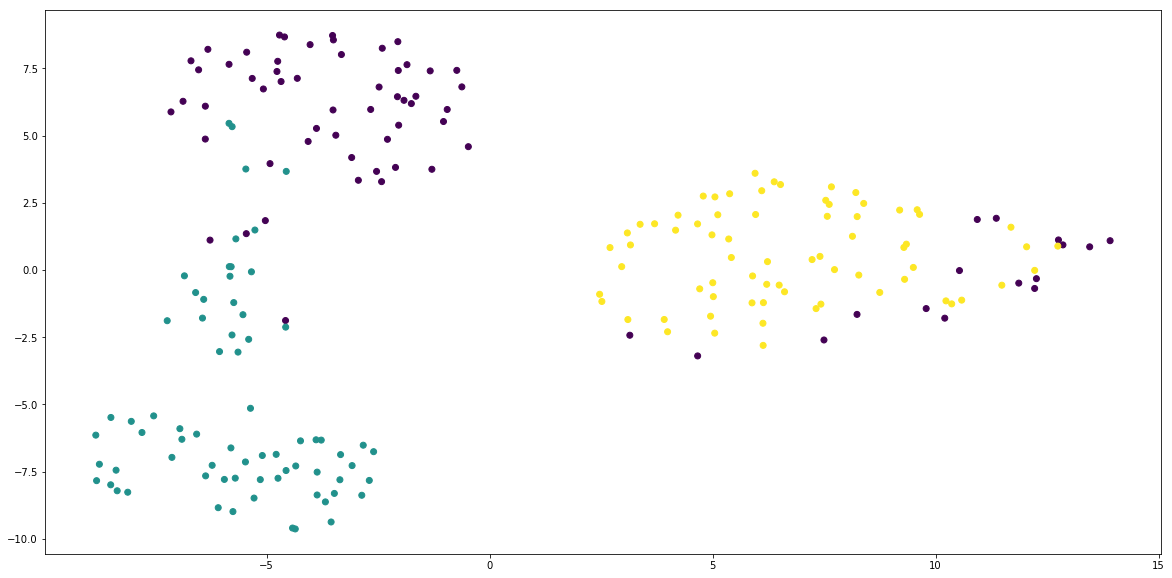

In [33]:
# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(20,10))
plt.scatter(xs, ys, c=varieties)
plt.show()